In [16]:
import pandas as pd
import seaborn as sns
from numpy.linalg import eigvals
from src.dataset import load_dataset
import matplotlib.pyplot as plt
import math

#### Caricamento e preparazione del dataset
In questa sezione vengono caricati i dataset di training relativi alle feature operative (X) e alle variabili target (y).
Successivamente, i due dataset vengono uniti in un unico DataFrame per facilitare l’analisi esplorativa.
Infine, viene ricostruita la variabile trq_target a partire dalla definizione del torque margin.


In [17]:
df_x_train= load_dataset("../../data/raw/train/X_train.csv")
df_y_train = load_dataset("../../data/raw/train/y_train.csv")
df= pd.merge(df_x_train,df_y_train,on="id").drop("id", axis=1)
df["trq_target"] = df["trq_measured"] / (df["trq_margin"] / 100 + 1)

df_x_val= load_dataset("../../data/raw/val/X_validation.csv").drop("id", axis=1)
df_x_test= load_dataset("../../data/raw/test/X_test.csv").drop("id", axis=1)

#### Statistiche descrittive di base
Vengono calcolate le statistiche descrittive principali per ottenere una prima visione dei range, della variabilità e dei valori centrali delle variabili.
Questo passaggio consente di individuare eventuali valori anomali e di comprendere le scale delle feature.

#### TRAIN

In [14]:
df.describe(percentiles=[0.5])

trq_measured            oat            mgt             pa  \
count  742625.000000  742625.000000  742625.000000  742625.000000   
mean       65.097549      12.675167     592.246116     511.776065   
std        13.253672       8.066084      39.654582     563.190555   
min        14.673340     -19.250000     467.300000    -208.389200   
50%        65.700000      13.703440     589.400000     340.461600   
max       104.730500      36.799130     723.400000    3097.510000   

                 ias             np             ng         faulty  \
count  742625.000000  742625.000000  742625.000000  742625.000000   
mean       79.324591      97.377919      95.517281       0.403189   
std        35.395075       3.996721       3.635084       0.490538   
min         0.000000      85.010000      90.001830       0.000000   
50%        88.375000      99.759770      94.810000       0.000000   
max       137.562500     101.560000     101.220000       1.000000   

          trq_margin     trq_target  
count  742625.000000  742625.000000  
mean       -1.157346      66.711490  
std        14.068843      14.170206  
min       -74.747111      22.454554  
50%         1.693847      66.001495  
max        34.148857     114.608196

#### VALIDATION

In [15]:
df_x_val.describe(percentiles=[0.5])

trq_measured           oat           mgt            pa           ias  \
count  21436.000000  21436.000000  21436.000000  21436.000000  21436.000000   
mean      63.887460     14.988302    582.830547    575.193958     85.693774   
std       12.546306      7.127069     37.849742    272.086787     29.769483   
min       28.500000     -2.250000    486.400000    -74.371200      0.000000   
50%       60.100000     17.750000    568.200000    539.496000     91.562500   
max       94.600000     29.500000    671.900000   1396.289000    134.437500   

                 np            ng  
count  21436.000000  21436.000000  
mean      99.884119     92.695696  
std        0.156928      2.510535  
min       97.910000     90.010000  
50%       99.880000     91.910000  
max      100.470000     98.460000

#### TEST

In [16]:
df_x_test.describe(percentiles=[0.5])

trq_measured           oat           mgt            pa           ias  \
count  21436.000000  21436.000000  21436.000000  21436.000000  21436.000000   
mean      71.849958     14.529646    604.361112    320.640301     79.315617   
std       12.299052      9.284377     34.620488    140.677754     44.731814   
min       42.400000     -1.250000    525.400000    -98.755200      0.000000   
50%       71.600000     18.500000    604.200000    311.505600     99.062500   
max       96.200000     30.750000    704.800000   1076.554000    134.812500   

                 np            ng  
count  21436.000000  21436.000000  
mean     100.023658     94.289616  
std        0.158040      2.210178  
min       99.150000     90.010000  
50%      100.020000     94.390000  
max      102.390000    100.210000

Di seguito vengono confrontate, per ciascuna feature, le principali statistiche descrittive nei training, validation e test set.Questa analisi consente di valutare la coerenza delle distribuzioni e verificare che i diversi sottoinsiemi rappresentino condizioni operative comparabili.


In [28]:
import pandas as pd

datasets = {
    "Train": df_x_train,
    "Validation": df_x_val,
    "Test": df_x_test
}

stats = ["mean", "std", "min", "50%", "max"]

for feature in df.columns:
    tables = []

    for name, df in datasets.items():
        desc = df[feature].describe(percentiles=[0.5])
        tables.append(desc[stats].rename(name))

    feature_table = pd.concat(tables, axis=1)

    print(f"\n Feature: {feature}")
    display(feature_table.round(3))


 Feature: trq_measured


Train  Validation    Test
mean   65.098      63.887  71.850
std    13.254      12.546  12.299
min    14.673      28.500  42.400
50%    65.700      60.100  71.600
max   104.730      94.600  96.200


 Feature: oat


Train  Validation    Test
mean  12.675      14.988  14.530
std    8.066       7.127   9.284
min  -19.250      -2.250  -1.250
50%   13.703      17.750  18.500
max   36.799      29.500  30.750


 Feature: mgt


Train  Validation     Test
mean  592.246     582.831  604.361
std    39.655      37.850   34.620
min   467.300     486.400  525.400
50%   589.400     568.200  604.200
max   723.400     671.900  704.800


 Feature: pa


Train  Validation      Test
mean   511.776     575.194   320.640
std    563.191     272.087   140.678
min   -208.389     -74.371   -98.755
50%    340.462     539.496   311.506
max   3097.510    1396.289  1076.554


 Feature: ias


Train  Validation     Test
mean   79.325      85.694   79.316
std    35.395      29.769   44.732
min     0.000       0.000    0.000
50%    88.375      91.562   99.062
max   137.562     134.438  134.812


 Feature: np


Train  Validation     Test
mean   97.378      99.884  100.024
std     3.997       0.157    0.158
min    85.010      97.910   99.150
50%    99.760      99.880  100.020
max   101.560     100.470  102.390


 Feature: ng


Train  Validation    Test
mean   95.517      92.696   94.29
std     3.635       2.511    2.21
min    90.002      90.010   90.01
50%    94.810      91.910   94.39
max   101.220      98.460  100.21

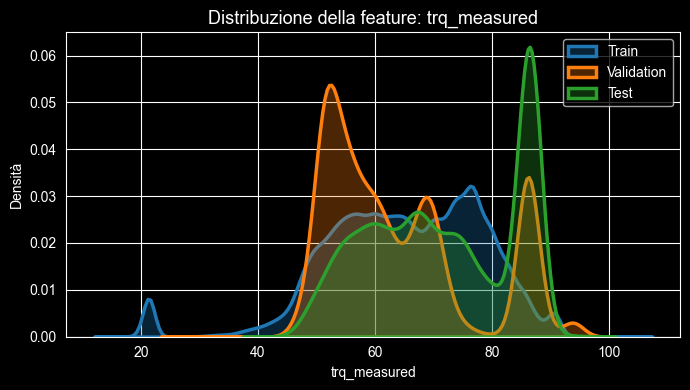

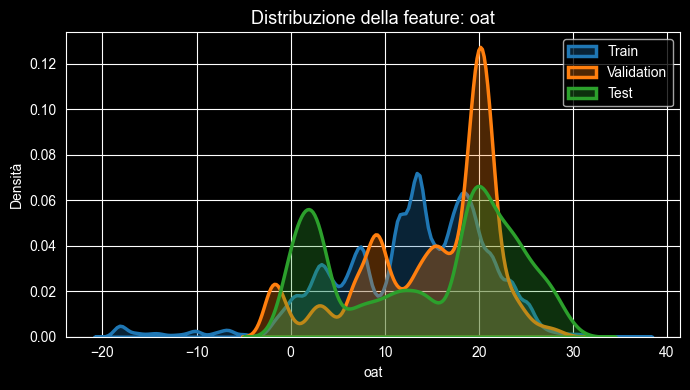

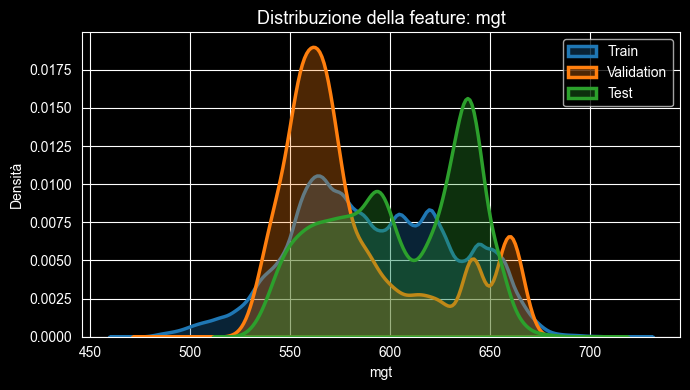

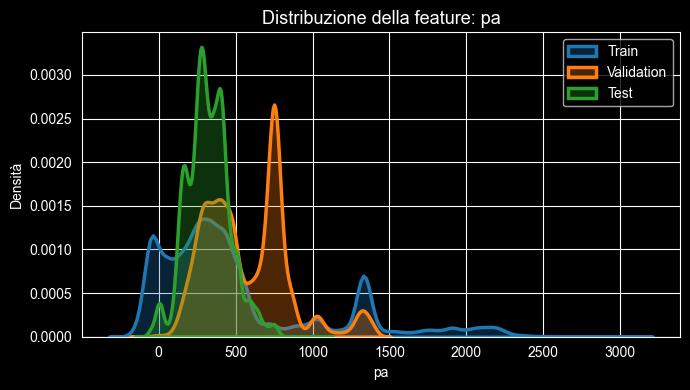

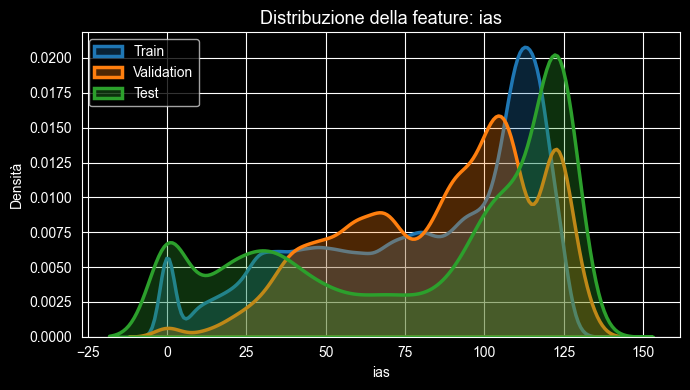

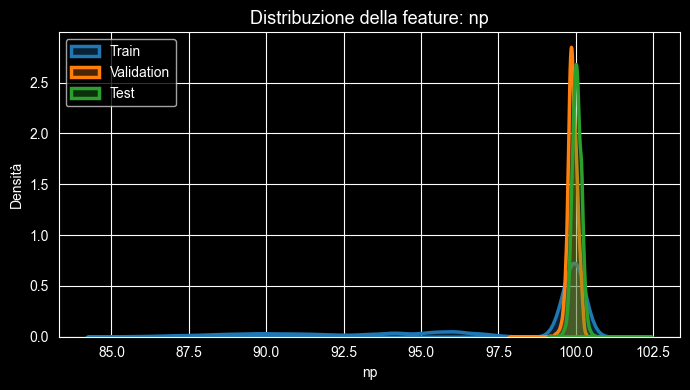

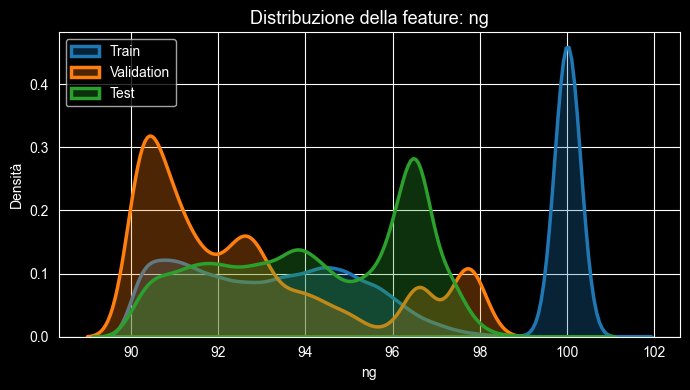

KeyError: 'faulty'

<Figure size 700x400 with 0 Axes>

In [38]:
features = df.columns

palette = {
    "Train": "#1f77b4",
    "Validation": "#ff7f0e",
    "Test": "#2ca02c"
}
for feature in features:
    plt.figure(figsize=(7, 4))

    sns.kdeplot(
        df_x_train[feature],
        label="Train",
        color=palette["Train"],
        fill=True,
        alpha=0.3,
        linewidth=2.5
    )

    sns.kdeplot(
        df_x_val[feature],
        label="Validation",
        color=palette["Validation"],
        fill=True,
        alpha=0.3,
        linewidth=2.5
    )

    sns.kdeplot(
        df_x_test[feature],
        label="Test",
        color=palette["Test"],
        fill=True,
        alpha=0.3,
        linewidth=2.5
    )

    plt.title(f"Distribuzione della feature: {feature}", fontsize=13)
    plt.xlabel(feature)
    plt.ylabel("Densità")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Distribuzione della classe di salute (faulty)
In questa sezione viene analizzata la distribuzione della variabile target faulty, che rappresenta lo stato di salute del motore:
- 0 = stato nominale
- 1 = stato guasto
L’obiettivo è verificare l’eventuale presenza di sbilanciamento tra le classi, aspetto cruciale per il task di classificazione.

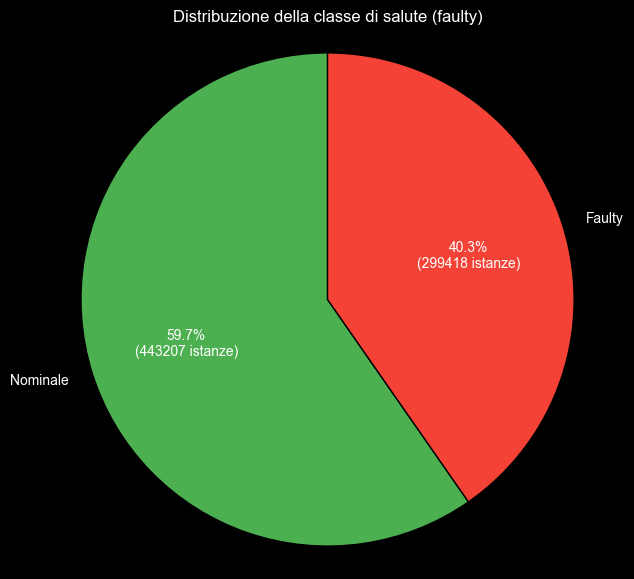

In [33]:
faulty_counts = df["faulty"].value_counts().sort_index()
labels = ["Nominale", "Faulty"]
colors = ["#4CAF50", "#F44336"]


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count} istanze)"
    return my_format

plt.figure(figsize=(7, 7))
plt.pie(
    faulty_counts,
    labels=labels,
    autopct=autopct_format(faulty_counts.values),
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)

plt.title("Distribuzione della classe di salute (faulty)")
plt.axis("equal")
plt.show()

La distribuzione della variabile faulty mostra uno sbilanciamento tra le classi, con una prevalenza di osservazioni in stato nominale rispetto a quelle guaste. Questo aspetto dovrà essere considerato nella fase di modellazione della classificazione.

#### Distribuzione del Torque Margin
Poiché la valutazione dello stato di salute del motore si basa sul torque margin, è fondamentale analizzarne preliminarmente la distribuzione all’interno del dataset. Il torque margin rappresenta infatti la variabile chiave attraverso cui è possibile individuare condizioni di sotto-prestazione del motore rispetto alla coppia di progetto.

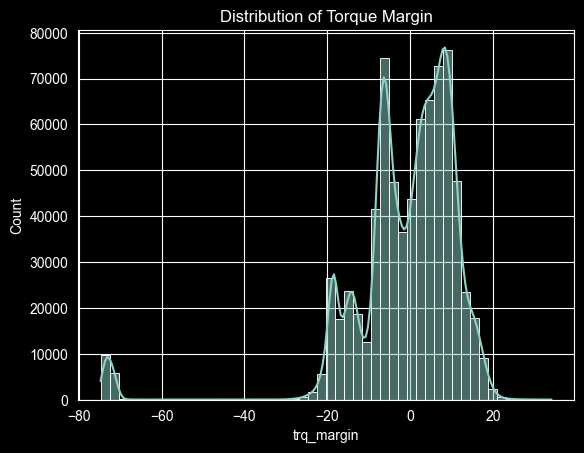

In [19]:
sns.histplot(df["trq_margin"], bins=50, kde=True)
plt.title("Distribution of Torque Margin")
plt.show()

### Distribuzione del Torque Margin e del Torque measured per classe di stato del motore

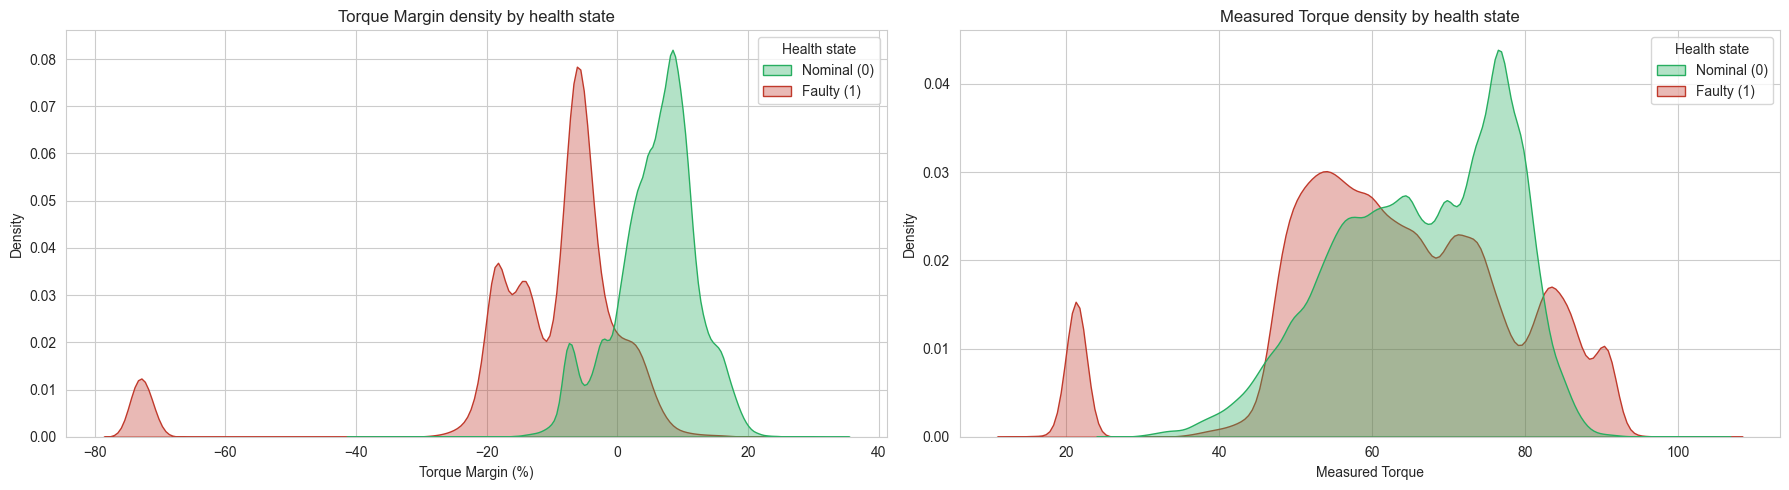

In [21]:
cols_to_num = ["trq_margin", "trq_measured", "faulty"]
for c in cols_to_num:
    df[c] = pd.to_numeric(df[c], errors="coerce")

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

kde_config = [
    ("trq_margin", "Torque Margin (%)", "Torque Margin density by health state"),
    ("trq_measured", "Measured Torque", "Measured Torque density by health state"),
]

palette = {0: "#27ae60", 1: "#c0392b"}

for ax, (col, xlabel, title) in zip(axes, kde_config):
    sns.kdeplot(
        data=df,
        x=col,
        hue="faulty",
        hue_order=[0, 1],
        fill=True,
        common_norm=False,
        palette=palette,
        alpha=0.35,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Density")

    leg = ax.get_legend()
    if leg is not None:
        leg.set_title("Health state")
        leg.texts[0].set_text("Nominal (0)")
        leg.texts[1].set_text("Faulty (1)")

plt.tight_layout()
plt.show()

## Influenza dello stato di salute sulle feature operative
In questa sezione viene analizzata l’influenza dello stato di salute del motore sulle principali feature operative.
L’obiettivo è verificare se le variabili misurate mostrino comportamenti differenti quando il motore opera in condizioni nominali (faulty = 0) rispetto a condizioni di guasto (faulty = 1).
Questa analisi rappresenta un passaggio fondamentale dell’Exploratory Data Analysis, in quanto consente di valutare il potenziale informativo delle singole feature rispetto allo stato di salute del motore e di guidare le successive fasi di selezione delle variabili e di modellazione.
Il confronto viene effettuato analizzando le distribuzioni delle feature nei due stati di salute attraverso rappresentazioni grafiche in grado di evidenziare differenze in termini di valore centrale, variabilità e forma della distribuzione.

### Analisi tramite box plot

I box plot vengono utilizzati come primo strumento di analisi per confrontare le distribuzioni delle feature operative tra motori nominali e guasti.
Questo tipo di grafico fornisce una sintesi robusta delle distribuzioni, basata sui quartili, ed è particolarmente adatto a individuare differenze sistematiche tra gruppi.
In particolare, i box plot consentono di:
- confrontare le mediane delle feature nei due stati di salute;
- osservare eventuali differenze nella dispersione dei dati;
- individuare la presenza di outlier, spesso associabili a condizioni operative anomale;
- valutare in modo preliminare il potere discriminante delle variabili rispetto allo stato di salute.

Le feature che mostrano uno spostamento significativo della mediana o una maggiore variabilità nello stato di guasto vengono considerate potenzialmente rilevanti e approfondite nelle analisi successive.

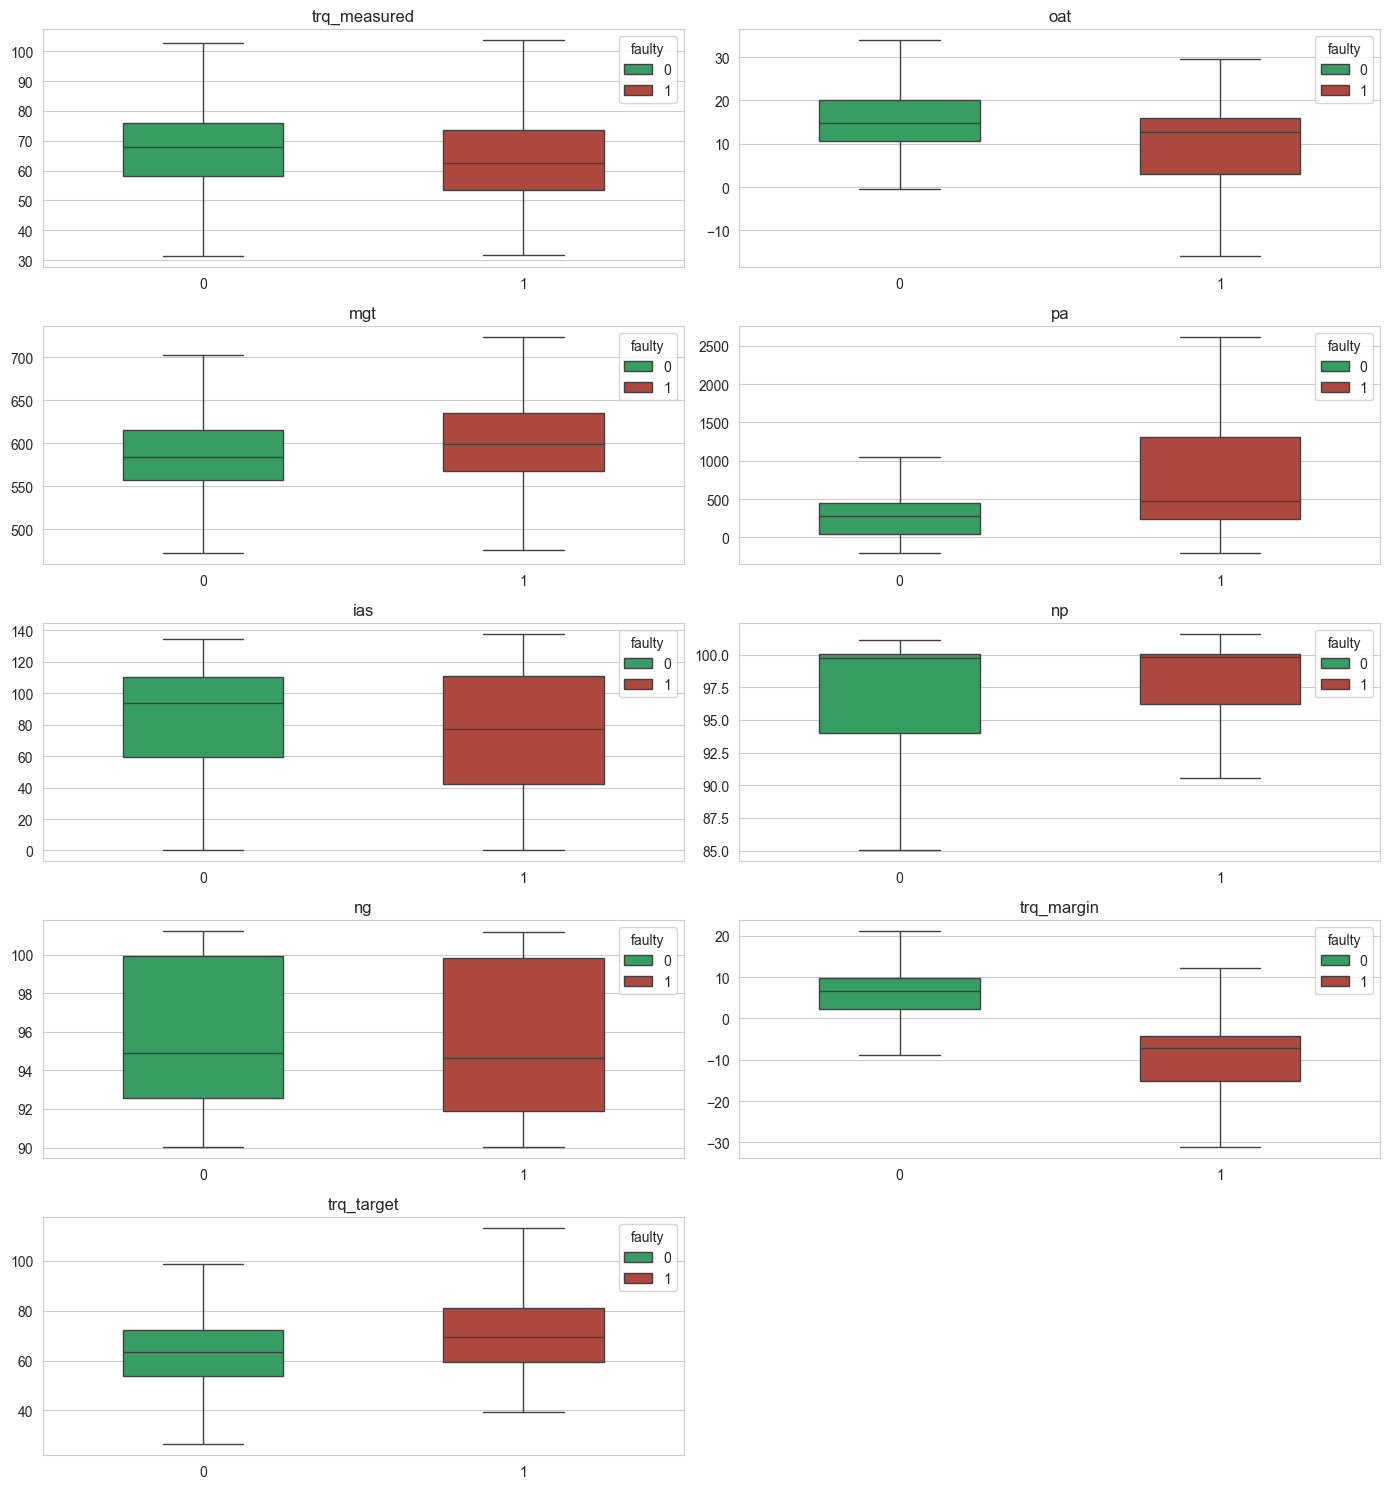

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [c for c in df.columns if c.lower() not in [ "faulty"]]

# figura dinamica
n = len(features)
rows = (n + 1) // 2
plt.figure(figsize=(14, rows * 3))

palette = {0: "#27ae60", 1: "#c0392b"}
for i, feat in enumerate(features, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(
        x=df_y_train["faulty"],
        y=df[feat],
        palette=palette,
        hue=df["faulty"],
        showfliers=False,
        width=0.5
    )
    plt.title(feat)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


## Violin

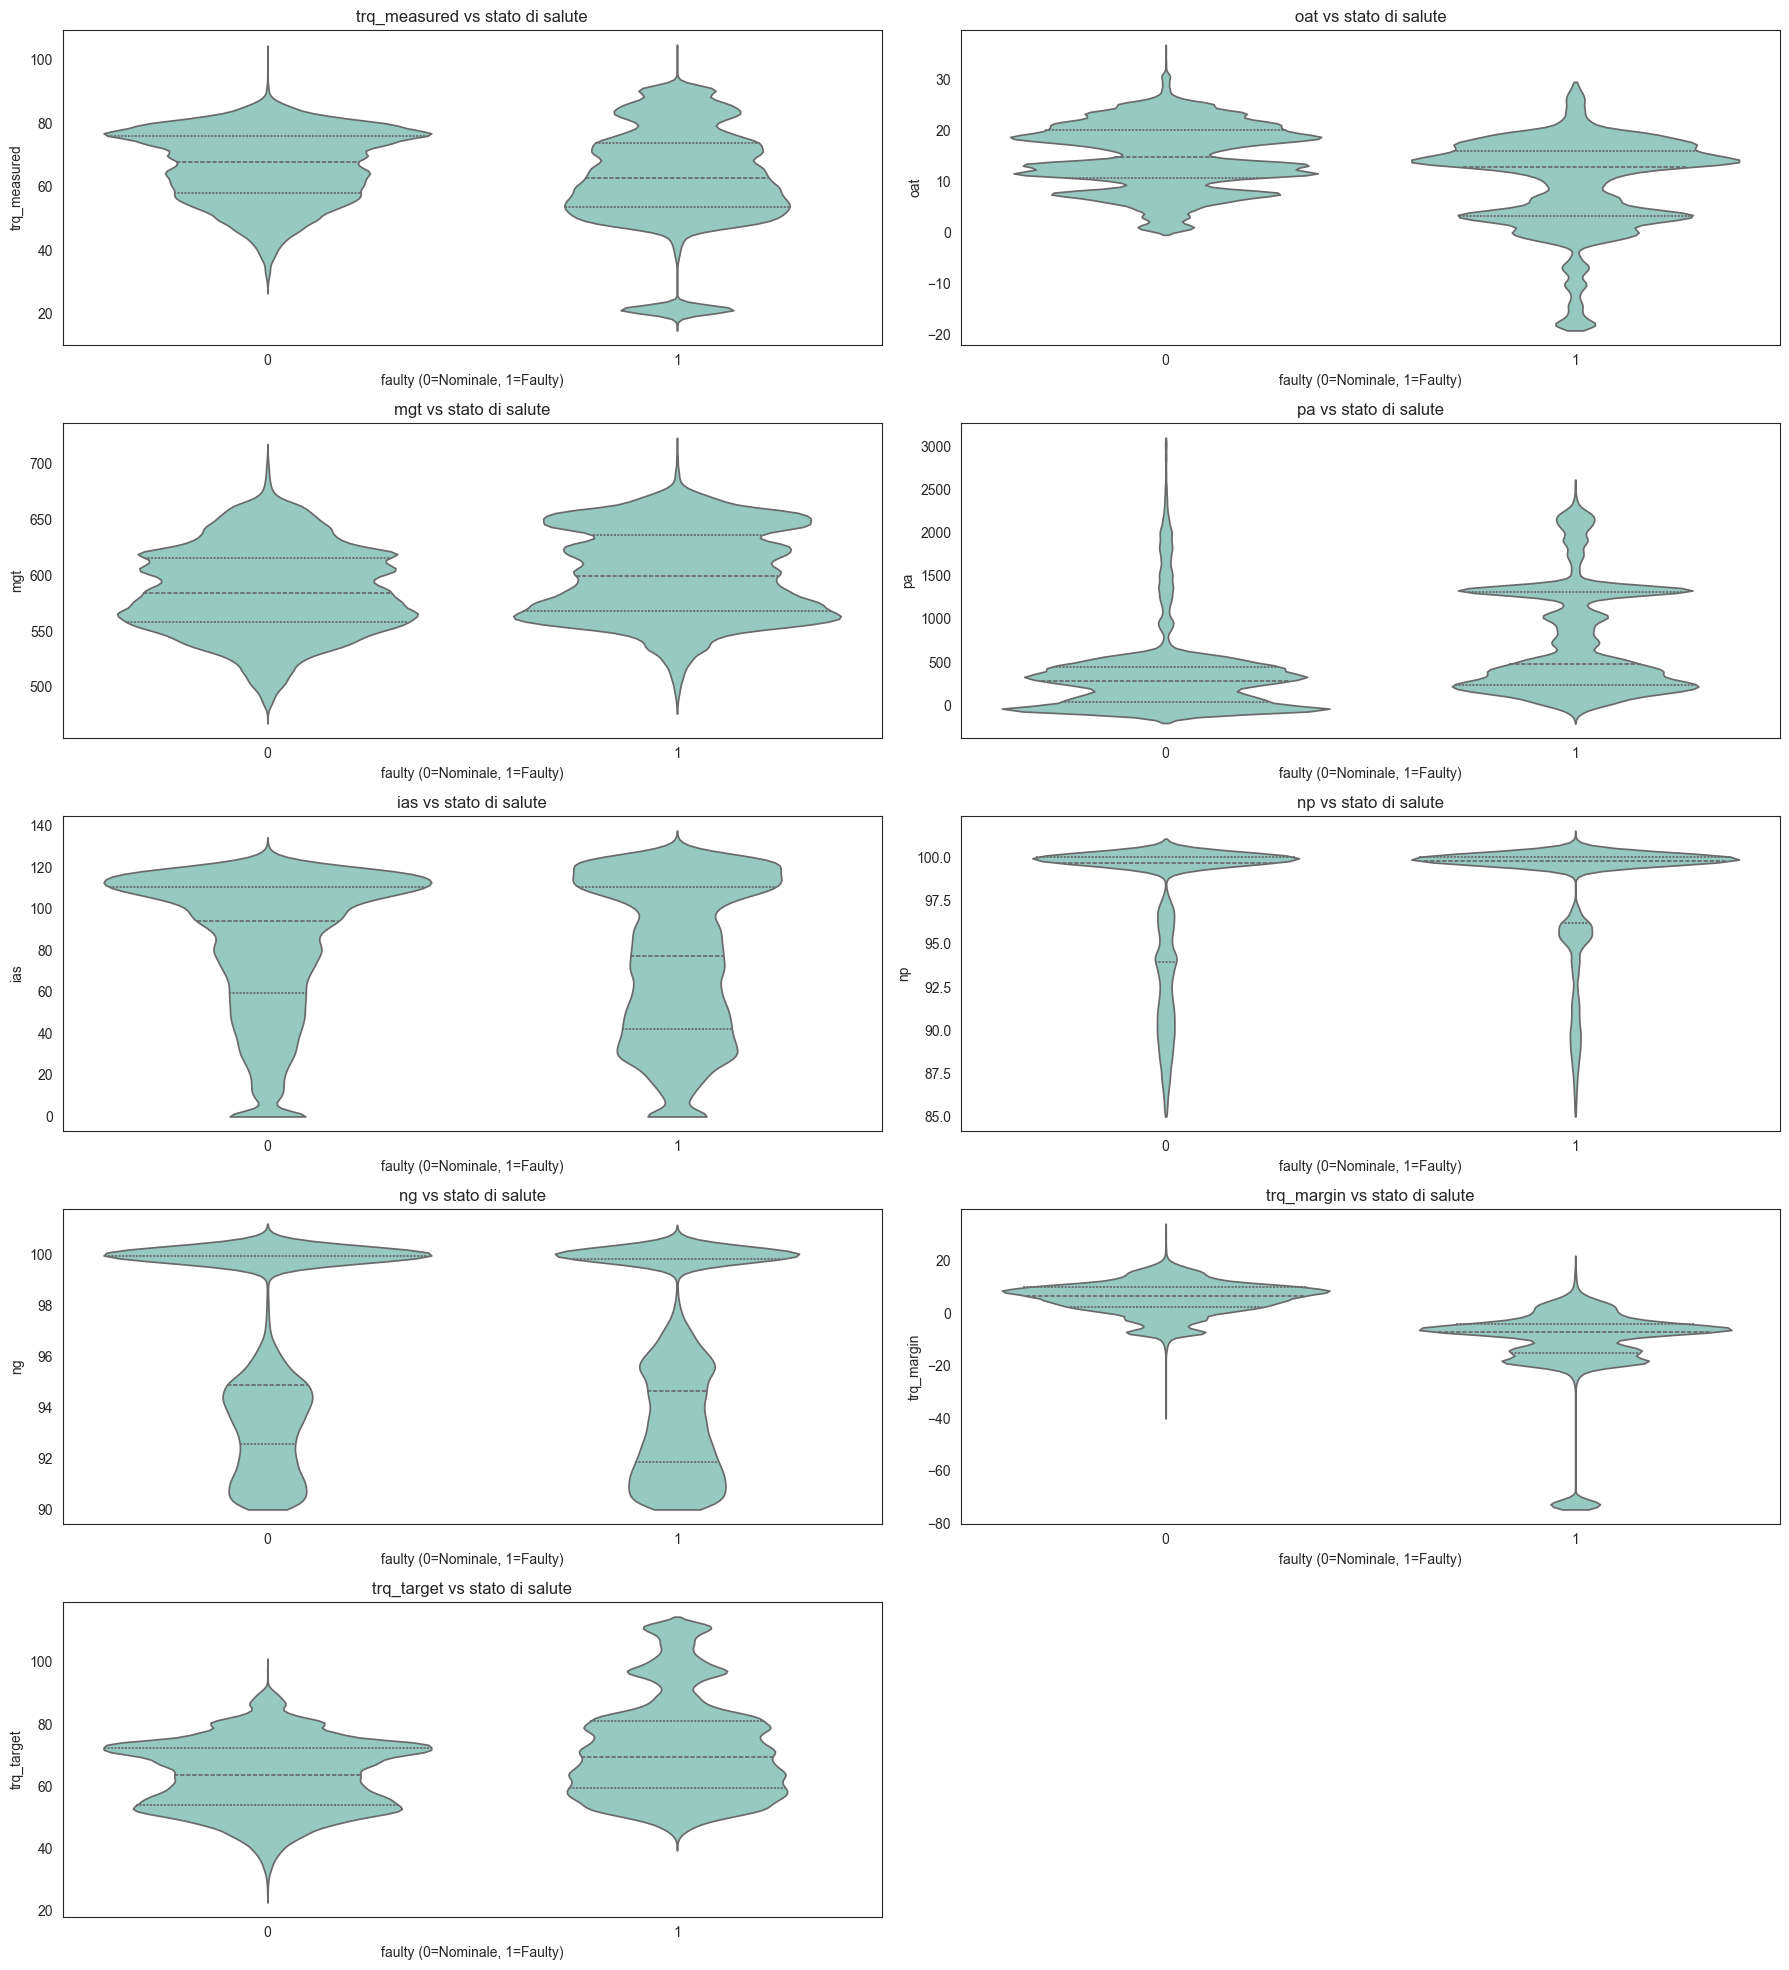

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [col for col in df.columns if col.lower() not in ["faulty"]]

plt.figure(figsize=(18, len(features) * 2.2))

for i, feature in enumerate(features, 1):
    plt.subplot((len(features) + 1) // 2, 2, i)
    sns.violinplot(
        x=df_y_train["faulty"],
        y=df[feature],
        inner="quartile",
        cut=0
    )
    plt.xlabel("faulty (0=Nominale, 1=Faulty)")
    plt.ylabel(feature)
    plt.title(f"{feature} vs stato di salute")

plt.tight_layout()
plt.show()

## Scatter Plot

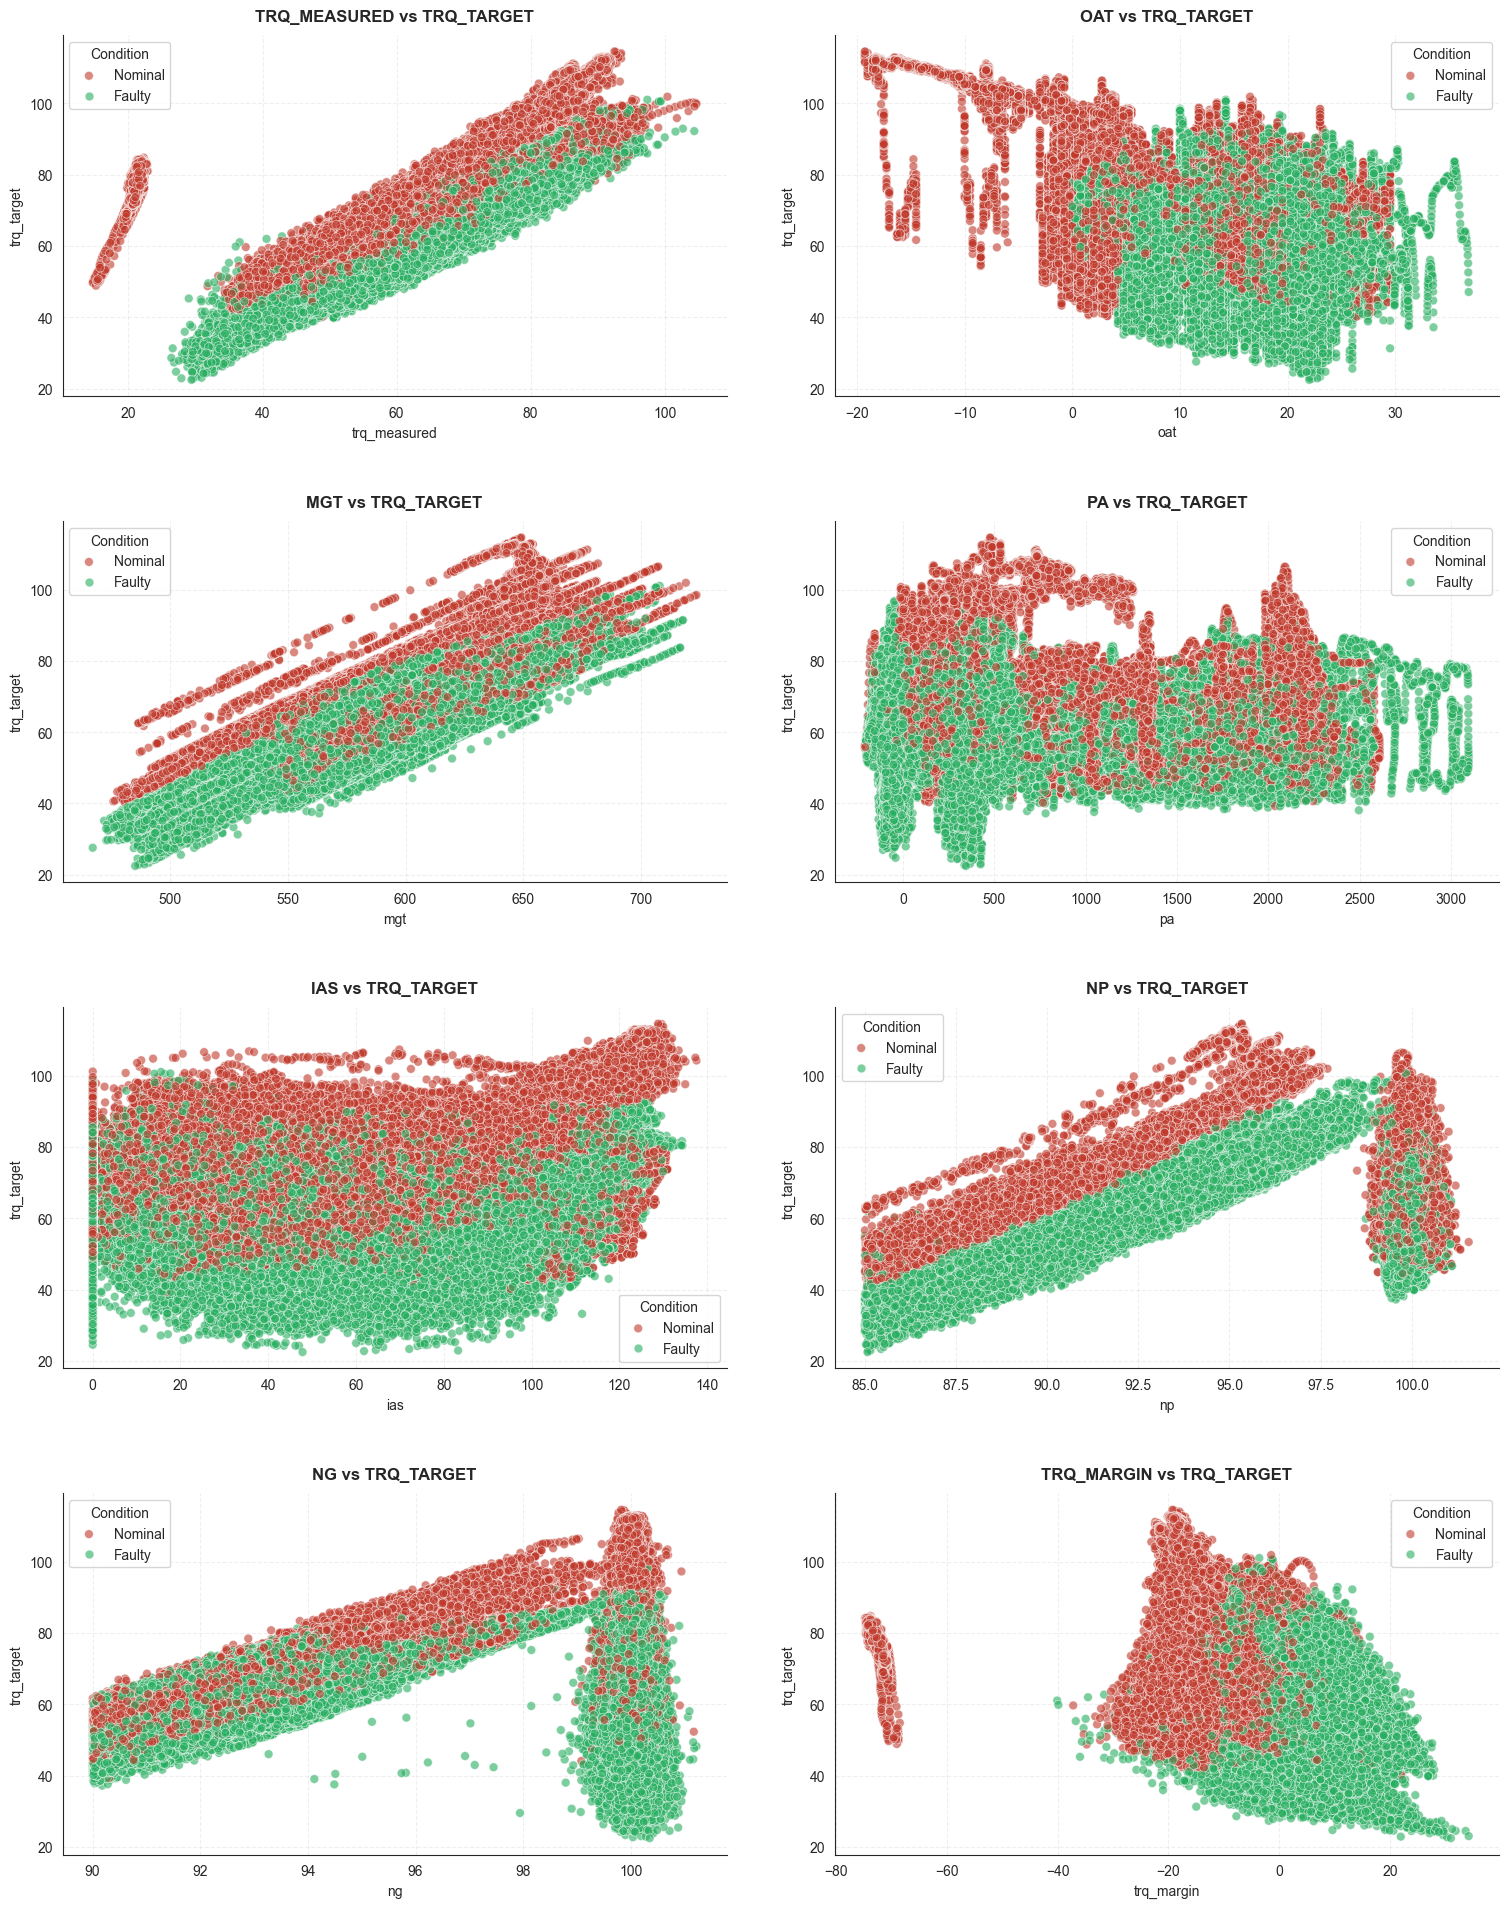

In [45]:
target_x = 'trq_target'
features = [col for col in df.columns if col not in [target_x,'faulty']]


n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

plt.figure(figsize=(16, n_rows * 5))
sns.set_style("white")

for i, feature in enumerate(features, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    sns.scatterplot(
        data=df,
        x=feature,
        y=target_x,
        hue='faulty',
        palette={0: "#27ae60", 1: "#c0392b"},
        alpha=0.6,
        s=40,
        edgecolor='w',
        linewidth=0.5
    )

    sns.despine()
    ax.set_title(f"{feature.upper()} vs {target_x.upper()}", fontsize=12, fontweight='bold', pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(title='Condition', labels=['Nominal', 'Faulty'], loc='best', frameon=True)

plt.tight_layout(pad=4.0)
plt.show()

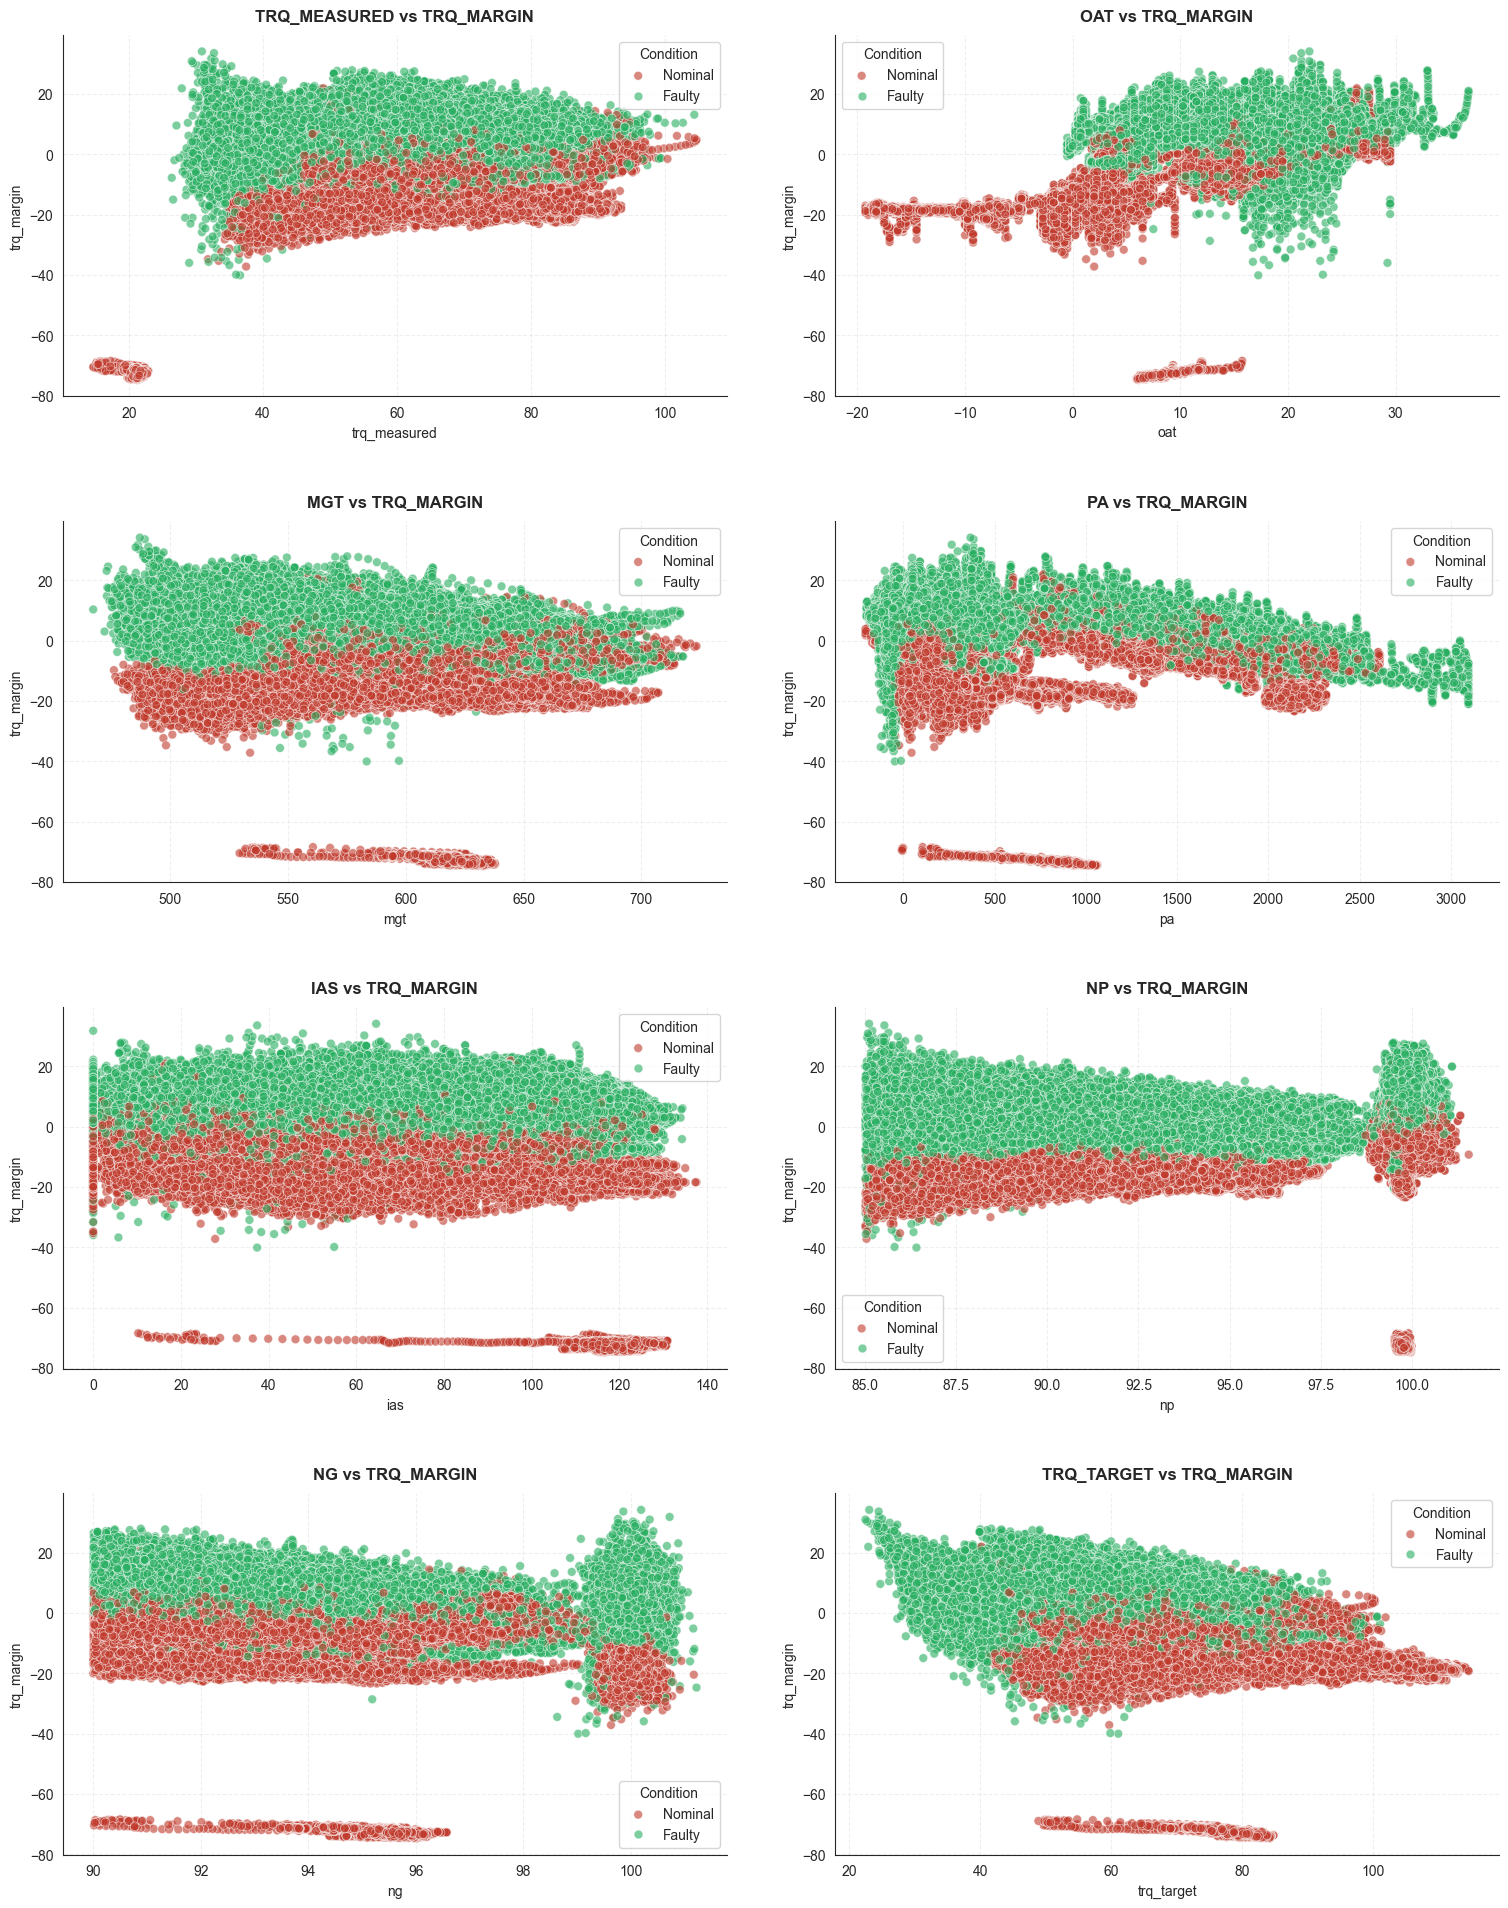

In [46]:
target_x = 'trq_margin'
features = [col for col in df.columns if col not in [target_x, 'faulty']]

n_cols = 2
n_rows = math.ceil(len(features) / n_cols)

plt.figure(figsize=(16, n_rows * 5))
sns.set_style("white")

for i, feature in enumerate(features, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    sns.scatterplot(
        data=df,
        x=feature,
        y=target_x,
        hue='faulty',
        palette={0: "#27ae60", 1: "#c0392b"},
        alpha=0.6,
        s=40,
        edgecolor='w',
        linewidth=0.5
    )

    sns.despine()
    ax.set_title(f"{feature.upper()} vs {target_x.upper()}", fontsize=12, fontweight='bold', pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend(title='Condition', labels=['Nominal', 'Faulty'], loc='best', frameon=True)

plt.tight_layout(pad=4.0)
plt.show()

## Matrice di correlazione

Cosi siamo in grado di vedere le correlazioni tra le feuture

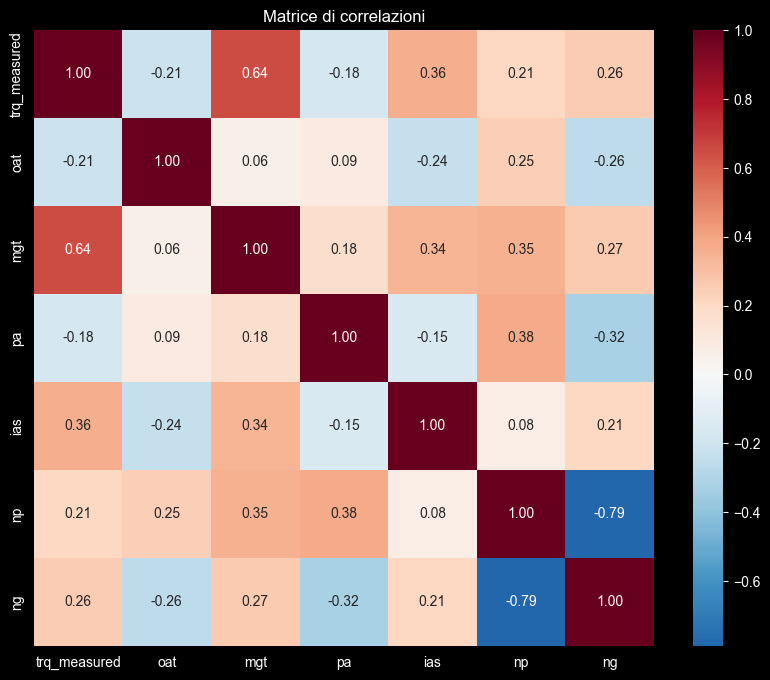

Condition Index : 205.5701510362462


In [25]:
#df_matrix["tlr"]=df_matrix["mgt"]/df_matrix["ng"]
#df_matrix["c_eff"]=df_matrix["trq_measured"]/(df_matrix["mgt"]-df_matrix["oat"])
df_matrix=df.drop(columns=['faulty','trq_target','trq_margin'])
#df_matrix['n_ratio']=df_matrix['np'].div(df_matrix['ng'])
#df_matrix=df_matrix.drop(columns=['np','ng'])
df_matrix.head()
plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix.corr(), annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title("Matrice di correlazioni")
plt.show()

eigenvalues = eigvals(df_matrix.corr())
condition_index = max(eigenvalues) / min(eigenvalues)

print(f'Condition Index : {condition_index}')

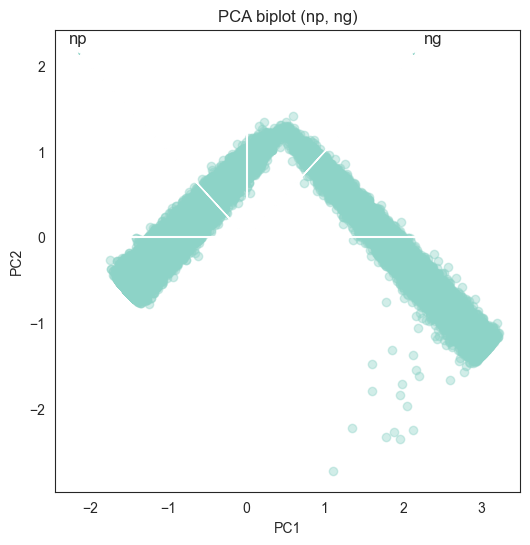

array([-0.70710678,  0.70710678])

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) prendo solo le due variabili
X = df[["np", "ng"]].dropna()

# 2) standardizzazione
X_std = StandardScaler().fit_transform(X)

# 3) PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


plt.figure(figsize=(6,6))

# punti nei nuovi assi PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4)

# vettori delle variabili originali
for i, var in enumerate(["np", "ng"]):
    plt.arrow(
        0, 0,
        pca.components_[0, i]*3,
        pca.components_[1, i]*3,
        head_width=0.05
    )
    plt.text(
        pca.components_[0, i]*3.2,
        pca.components_[1, i]*3.2,
        var,
        fontsize=12
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0)
plt.axvline(0)
plt.title("PCA biplot (np, ng)")
plt.show()
pca.components_[0]

In [69]:
df_matrix["PC1"] = X_pca[:, 0]
df_matrix=df_matrix.drop(columns=["np",'ng'])
display(df_matrix.head())

trq_measured       oat       mgt         pa       ias       PC1
0        54.100   2.00000  544.5000   212.1408  74.56250  2.252355
1        49.625  24.22231  578.4844  1625.6400  30.35596 -1.188284
2        52.000   7.00000  566.1000  1912.9250  65.62500 -1.375168
3        62.400   7.25000  560.1000   277.0632  54.81250  2.118543
4        62.900  23.25000  593.7000    53.6448  73.43750 -1.099103

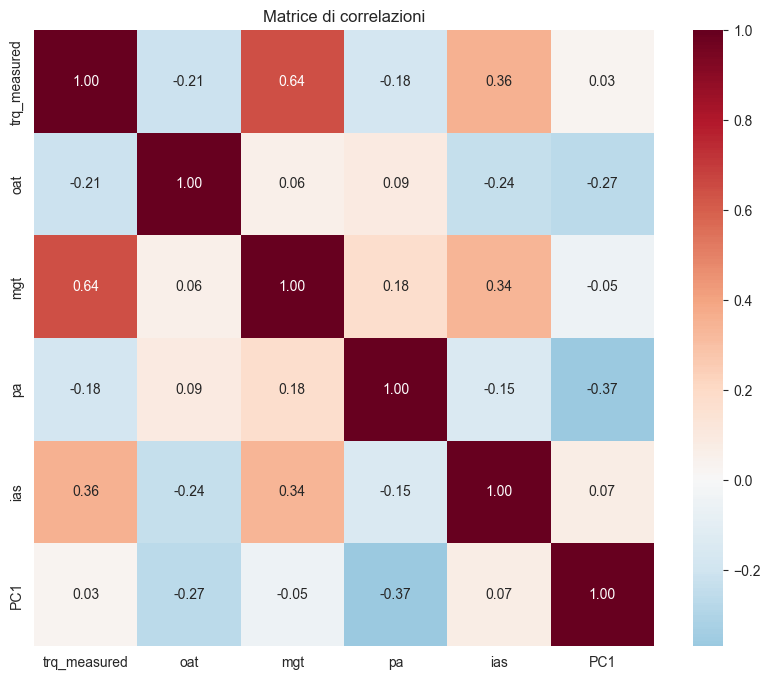

Condition Index: 9.665445129561977


In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix.corr(), annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title("Matrice di correlazioni")
plt.show()
from numpy.linalg import eigvals

eigenvalues = eigvals(df_matrix.corr())
condition_index = max(eigenvalues) / min(eigenvalues)

print(f'Condition Index: {condition_index}')

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_pca = ["trq_measured", "oat", "mgt", "pa", "ias", "faulty","np","ng"]

X = df[features_pca].dropna()
X_const = sm.add_constant(X)

vif_all_after = pd.DataFrame({
    "variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_all_after)

       variable           VIF
0         const  75600.183396
8            ng     43.936117
7            np     43.912285
3           mgt     18.714316
1  trq_measured      3.041808
2           oat      2.166825
6        faulty      2.146166
4            pa      1.514021
5           ias      1.492445


In [39]:
features_pca = ["trq_measured", "oat", "mgt", "pa", "ias", "PC1", "faulty"]

X = df[features_pca].dropna()
X_const = sm.add_constant(X)

vif_all_after = pd.DataFrame({
    "variable": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_all_after)

       variable         VIF
0         const  338.905240
3           mgt    3.221261
1  trq_measured    2.970484
2           oat    2.055934
7        faulty    1.927163
4            pa    1.512817
5           ias    1.404629
6           PC1    1.361160
